### Interpolation, Derivatives, Integrals and Optimization

#### Week 06 - March 13, 2017


## Interpolation techniques 

* Nearest Neighbor - Uses the nearest single data point
* Linear interpolation - Uses the two closest data points and draws a line between them <br>
* Cubic spline - Uses more nearby data points and fits a piecewise cubic polynomial <br>

#### Linear interpolation

$ \frac{\Delta z}{\Delta x}$ is same between all points

Find the data point $(x,z)$ that falls between $(x_1,z_1)$ and $(x_2,z_2)$. The value $z$ is unknown, but $x$ is known and falls between $x_1$ and $x_2$.<br>

### $ \frac{z - z_1}{x - x_1} = \frac{z_2 - z_1}{x_2 - x_1 } $

$ z_i = \frac{z_2 - z_1}{x_2 - x_1 }\left(x - x_1\right) + z_1 $

#### Interpolation in Python

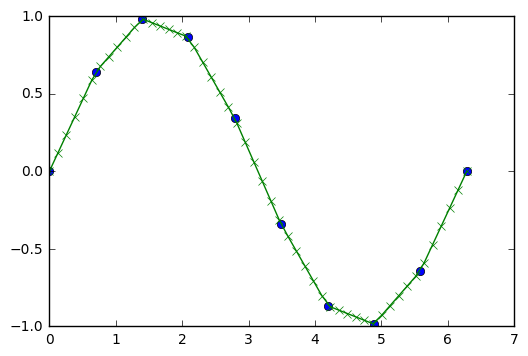

In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# From np.interp doc-String
x = np.linspace(0,2*np.pi, 10)
y = np.sin(x)
xvals = np.linspace(0, 2*np.pi, 50)
yinterp = np.interp(xvals, x, y)

fig, ax = plt.subplots()
ax.plot(x,y,'o')
ax.plot(xvals,yinterp,'-x')

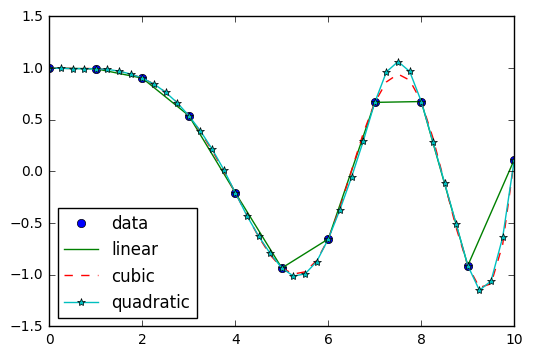

In [19]:
from scipy.interpolate import interp1d
    
x = np.linspace(0,10,num=11, endpoint=True)
y = np.cos(-x**2/9.0)
f = interp1d(x,y)
f2 = interp1d(x,y, kind='cubic')
f3 = interp1d(x,y, kind='quadratic')


xnew = np.linspace(0,10, num =41, endpoint=True)
fig, ax = plt.subplots()
ax.plot(x,y,'o',xnew, f(xnew), '-', xnew, f2(xnew), '--',xnew,f3(xnew),'*-')
plt.legend(['data','linear','cubic','quadratic'],loc='best',numpoints = 1)

#### Splines

Originally, mechanical splines where used in boat building to draw a curved line through a set of points

Linear interpolation to design a hull would result in a an ugly inefficient boat design

[Interactive spline example](http://blog.ivank.net/interpolation-with-cubic-splines.html)

Splines use data from not only the two nearest points, but also the the two points around the inner two.

- "piecewise" fit
   -different polynomial for each interval between points
- line : $ z = ax+b$ (two unkowns)
- cubic : $z = ax^3 + bx^2 +cx +d$  (four unknowns)


|                                                            Pros                                                           	|                              Cons                             	|
|:-------------------------------------------------------------------------------------------------------------------------:	|:-------------------------------------------------------------:	|
|                                  smooth, not jagged: calculate derivatives at data points                                 	|       Closely spaced data points  leads to overshooting       	|
|                    Piecewise fit, i.e. the solution at  one locations don't affect the solution far away                    	| "Smoothing splines" help, but  doesn't represent data exactly 	|
| Way better than fitting a  polynomial to the entire function (ie if you have 8 data point and fit a 9th order polynomial) 	|                                                               	|

## Derivatives - finite difference approximations ###

__Derivatives__ describe how a function changes in space or in time. Exact solutions for derivatives are known for certain continuous functions, like $\sin(x)$ or $\exp(x)$. Continuous functions like this have an _infinite_ number of points in any given interval.

__Finite difference__ methods are used to approximate derivatives when information is only known at a _finite_ number of discrete points. This would be the case for observations or a numerical model.

__Goal__: estimate $f'(t) = \frac{df}{dt}$ at a specific time $t_0$, where $f(t)$ is a _finite_ time series sampled at interval $\Delta t$<br>


<img src='images/finiteelement_FcnOneVar.png' width="600">
[source](http://www.goddardconsulting.ca/image-files/finiteelement_FcnOneVar.jpg)
### Taylor series expansions 

The finite difference approximations used to estimate derivatives from discrete data or model output are based on Taylor series expansions, which is a way of representing a function as an infinite number of terms based on the derivatives of the function. For points in the neighborhood of some point $t$ (a small values $\Delta t$ away), the function $f$ can be expressed as Taylor series expansions about $t$.

$f(t+\Delta t) = f(t) + \Delta t \frac{df(t)}{dt} + \frac{\Delta t^2}{2!} \frac{d^2 f(t)}{dt^2} + \frac{\Delta t^3}{3!} \frac{d^3 f(t)}{dt^3} +  \ldots$

$f(t-\Delta t) = f(t) - \Delta t \frac{df(t)}{dt} + \frac{\Delta t^2}{2!} \frac{d^2 f(t)}{dt^2} - \frac{\Delta t^3}{3!} \frac{d^3 f(t)}{dt^3} +  \ldots$

Subtracting these two expansions about $t - \Delta t$ and $t + \Delta t$,

$f(t+\Delta t) - f(t-\Delta t) = 2 \Delta t \frac{df(t)}{dt}  + 2 \frac{\Delta t^3}{3!} \frac{d^3 f(t)}{dt^3} +  \ldots$

and rearranging gives an expression for the derivative $\frac{df(t)}{dt}$.

$\frac{df(t)}{dt} = \frac{f(t+\Delta t) - f(t-\Delta t)}{2 \Delta t} + \frac{\Delta t^2}{3!}\frac{d^3 f(t)}{dt^3} + \ldots$

This can be used to approximate the derivative at $t$ based on the nearby values $f(t-\Delta t)$ and $f(t+\Delta t)$.

$\frac{df(t)}{dt} \approx \frac{f(t+\Delta t) - f(t-\Delta t)}{2 \Delta t} + O(\Delta t^2) $

The second-order terms involving $\Delta t^2$ and higher are left out of this approximation. This results in a __truncation error__, since the infinite number of terms in the Taylor series expansion has been truncated. This approximation is called a second-order accurate center difference scheme.

Similar derivations can be used to approximate higher derivaties, more accurate derivatives with reduced truncation errors, and forward- and backward- difference schemes that can be used near boundaries or to use only information at past times. Equations for a variety of cases are given below for reference.

#### Second order accurate center-difference schemes

$f'(t) = [f(t+\Delta t) - f(t-\Delta t)]/2\Delta t$

$f''(t) = [f(t+\Delta t) - 2f(t) + f(t-\Delta t)]/\Delta t^2$

$f'''(t) = [f(t+2\Delta t) - 2f(t+\Delta t) + 2f(t-\Delta t) - f(t-2\Delta t)]/2\Delta t^3$

#### Fourth order accurate center-difference schemes

$f'(t) = [-f(t+2\Delta t) + 8f(t+\Delta t) - 8f(t-\Delta t) + f(t-2\Delta t)]/12\Delta t$

$f''(t) = [-f(t+2\Delta t) + 16f(t+\Delta t) - 30f(t) + 16f(t-\Delta t) - f(t-2\Delta t)]/12 \Delta t^2$

$f'''(t) = [-f(t+3\Delta t) + 8f(t+2\Delta t) - 13f(t+\Delta t) + 13f(t-\Delta t) - 8f(t-2\Delta t) + f(t-3\Delta t)]/8\Delta t^3$

#### Second order accurate forward- and backward- difference schemes

$f'(t) = [-3f(t) + 4f(t+\Delta t) - f(t+2\Delta t)]/2\Delta t$

$f'(t) = [3f(t) - 4f(t-\Delta t) + f(t-2\Delta t)]/2\Delta t$

$f''(t) = [2f(t) - 5f(t+\Delta t) + 4f(t+2\Delta t) - f(t+3\Delta t)]/\Delta t^3$

$f''(t) = [2f(t) - 5f(t-\Delta t) + 4f(t-2\Delta t) - f(t-3\Delta t)]/\Delta t^3$

## Approximating an integral

##### Rectangle rule:

* Intuitive approach
* Divide curve into a series of rectangles
* Like all methods, gets better and better and $\Delta t$ gets smaller

<img src='images/Integration_rectangle.png' width="400">
[source](https://en.wikipedia.org/wiki/Numerical_integration)

##### Trapezoidal rule:

Reduces error by taking into account two nearby points (instead of one).

$$\int^{t_2}_{t_1} f(t)dt \approx \frac{1}{2}[f(t_1) + f(t_2)]\Delta t$$

<img src='images/Integration_trapezoid.png' width="400">
[source](https://en.wikipedia.org/wiki/Numerical_integration)

##### Simpson's rule:

Reduces error further by accounting for curvature by including more points.

### Examples of numerical integration: ###

<img src='images/upwelling_index.png' width="800">
[source](http://www.pfeg.noaa.gov/products/PFEL/modeled/indices/upwelling/upwelling.html)

<img src='images/rain_mlml.png' width="800">

[source](http://pubdata.mlml.calstate.edu/weather/wateryears.png)

## Optimization

#### Parameter estimation: linear fit

For _linear_ problems, you can set up a design matrix and use the least squares fit. Examples we have already discussed include:<br>

* Linear regression: $ y = mx + b $<br>

* Multiple linear regression: $ y = b_0 + b_1x_1 + b_2x_2 $<br>

* Harmonic fit: $ y = a_1 + a_2 \sin(x) + a_3 \cos(x) $

The problems are all classified as linear, even if the functions do not descirbe only straight lines, because the unknown coefficients are on the outside the terms in the equation.

#### Parameter estimation: nonlinear fit

A simple function that requires a non-linear fit is a model for exponential growth. In this carse, it is not possible to use direct design matrix.


##### Finding the parameters

Two ways:
1. Log Transform -> linear fit
2. optimization (iterative methods)

The optimization approach minimizes a _cost function_, $J$, which is usually the sum of errors. 

$J = \sum^N_{i=1} w_i(\hat{y}_i - y_i)^2$ - sum of squared errors or mean of squared errors

$w_i$ is the weight for each data points

$\hat{y}_i$ is the model estimate

$y_i$ is the observation

$J$ can also be thought of as a chi-square variable since it is the sum of squares.

__Goal: minimize J__

[]

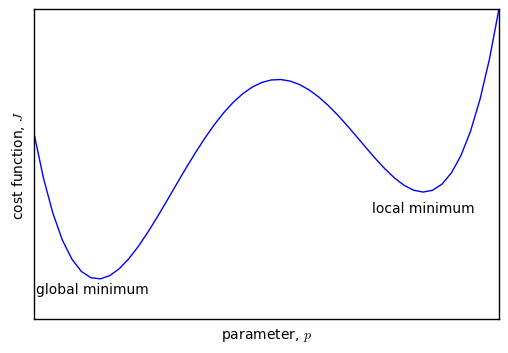

In [20]:
# plot an idealized polynomial cost function for illustrative purposes
p = np.linspace(-4,4)
plt.figure()
plt.plot(p,0.02*(p+4)*(p+1)*(p-1.5)*(p-3.5))
plt.gca().annotate('global minimum',
            xy=(-3,-1.2), xycoords='data',
            horizontalalignment='center', verticalalignment='top')
plt.gca().annotate('local minimum',
            xy=(2.7,-0.55), xycoords='data',
            horizontalalignment='center', verticalalignment='top')
plt.xlabel('parameter, $p$')
plt.ylabel('cost function, $J$')
plt.gca().get_xaxis().set_ticks([])
plt.gca().get_yaxis().set_ticks([])

The figure above shows the cost function ($J$, y-axis) for a model that depends on one parameter($p$, x-axis).

The minimum J must occur when: 
### $\frac{\partial J}{\partial p } = 0$###

Note that there can be only one global minimum but many local minima. If a cost function is noisy, with many local minima, the parameter optimization problem becomes difficult. Constraining the range of possble parameter values is one way to make the problem easier. There are many algorithms for finding the minimum in $J$. The best approach depends on the problem and the structure of the cost function.

### Optimization with two parameters ###

##### Example: exponential growth

$y = a_1 e^{a_2x}$ - modeling exponential growth

This equation means that overall growth rate depends on the population size. For example, if we were trying to model a phytoplankton population, $P$, then the overall growth rate of the population could be expressed as:

$\frac{dP}{dt} = \mu P$, 

where the constant $\mu$ is the specific growth rate $[d^{-1}]$. It is related to the doubling time of the population<br>

$\mu = \frac{\ln(2)}{\text{doubling time}}$.

The analytical solution for the population as a function of time is:

$ P(t) = P_0 e^{\mu t}$

where $P_0$ is the initial population at $t = 0$.


If there are two unknown parameters he cost function can be visualized as a topography in _parameter space_. Local minima in $J$ are found in the valleys of the topography. For three dimensions or more, it is harder to visualize the cost function in _parameter hyperspace_, but the idea is the same. 

<img src='images/cost_fxn_3.png' width="500">
[source](http://www.scipy-lectures.org/advanced/mathematical_optimization/)

For two parameters, the optimization problem becomes difficult if the minimum is in a long valley rather than a deep hole. Sometimes this issue can be avoided by scaling the parameters so that their values are of the same order (similar to the approach of standardizing variables in the multiple linear regression problem).

The details of different types of algorithms, and their implementation in Python, can be found at http://www.scipy-lectures.org/advanced/mathematical_optimization/